In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib 

In [2]:
accident_df_2019 = pd.read_csv('Accident_Data_2019_dropna.csv')
accident_df_2020 = pd.read_csv('Accident_Data_2020_dropna.csv')
#accident_df_2020.head()

In [3]:
d = {'State':['WA','OR','CA',
               'MT','ID','NV','WY','UT','CO','AZ','NM',
               'ND','SD','NE','KS','MN','IA','MO',
               'TX','OK','AR','LA',
               'WI','IL','MI','IN','OH',
               'KY','TN','MS','AL',
               'ME','VT','NH','MA','CT','RI',
               'NY','NJ','PA',
               'WV','DE','MD','VA','NC','SC','GA','FL'],
    'Division':['Pacific','Pacific','Pacific',
                'Mountain','Mountain','Mountain','Mountain','Mountain','Mountain','Mountain','Mountain',
                'West North Central','West North Central','West North Central','West North Central','West North Central','West North Central','West North Central',
                'West South Central','West South Central','West South Central','West South Central',
                'East North Central','East North Central','East North Central','East North Central','East North Central',
                'East South Central','East South Central','East South Central','East South Central',
                'New England','New England','New England','New England','New England','New England',
                'Middle Atlantic','Middle Atlantic','Middle Atlantic',
                'South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic']}
all_div_df = pd.DataFrame(data=d)
all_div_df.head()
accident_df_2019_w_divisions = pd.merge(accident_df_2019,all_div_df,on='State')
#accident_df_2019_w_divisions.head()
accident_df_2020_w_divisions = pd.merge(accident_df_2020,all_div_df,on='State')
#accident_df_2020_w_divisions.head()

In [4]:
sum_sev_by_div_df = pd.DataFrame(accident_df_2019_w_divisions.groupby('Division')['Severity'].sum().rename('Sum_of_Severity_Scores').reset_index())
sum_sev_by_div_df

,Division,Sum_of_Severity_Scores
0,East North Central,129244
1,East South Central,86128
2,Middle Atlantic,139112
3,Mountain,116161
4,New England,39157
5,Pacific,434405
6,South Atlantic,386537
7,West North Central,85687
8,West South Central,197912


Text(0, 0.5, 'Sum of Severity')

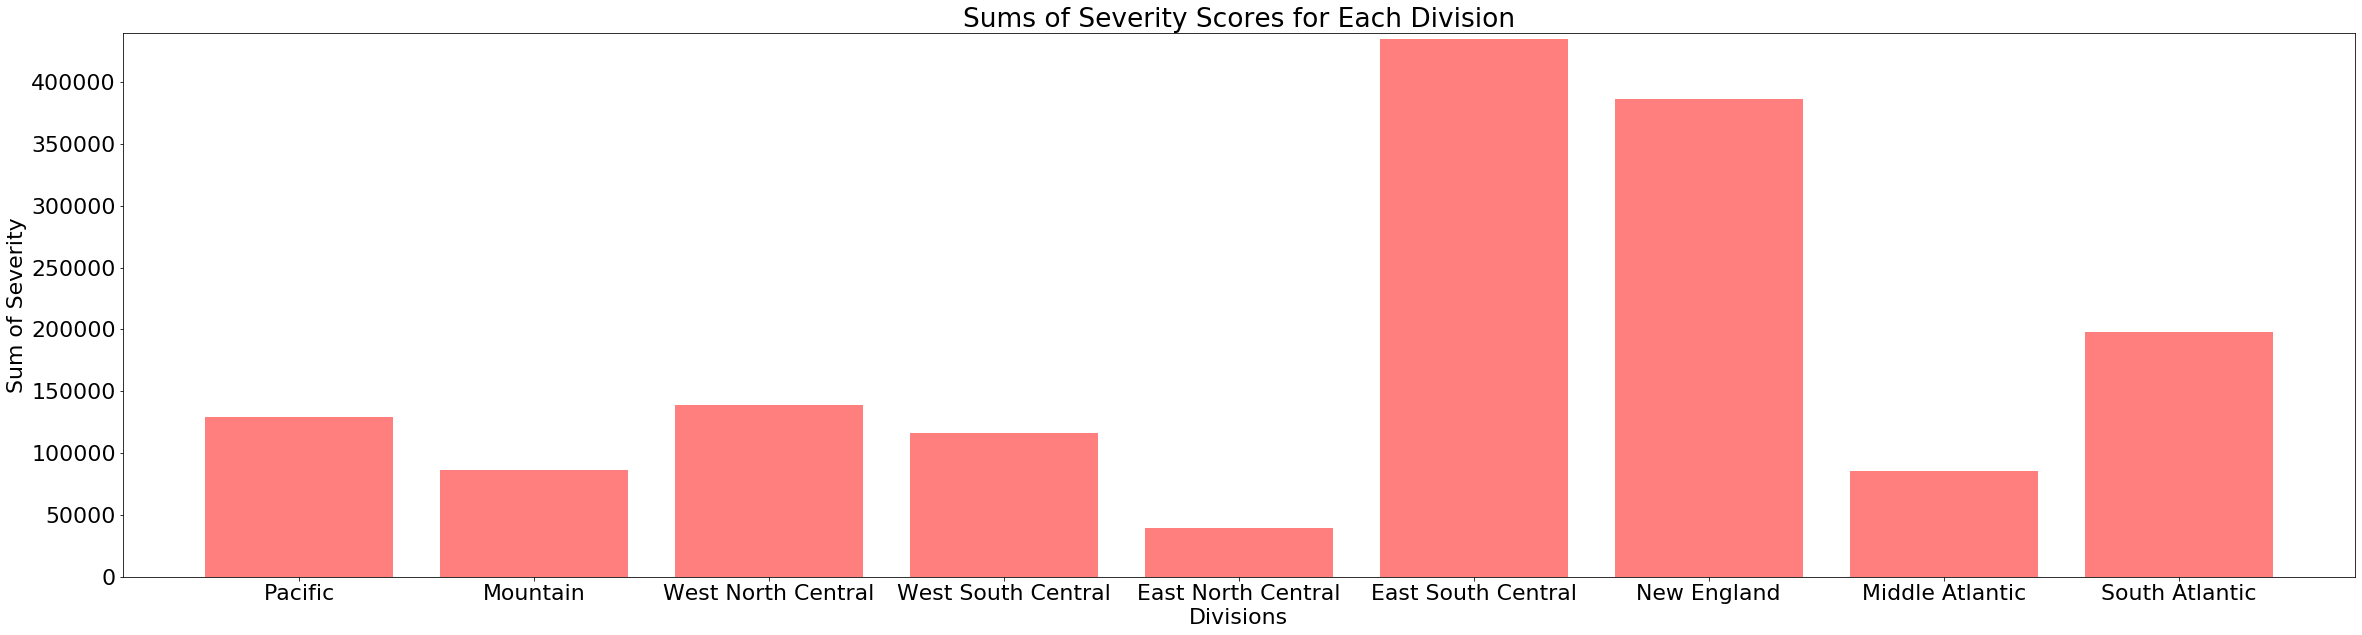

In [9]:
sev_sum = sum_sev_by_div_df['Sum_of_Severity_Scores']
x_axis = np.arange(len(sev_sum))
plt.figure(figsize=(40, 10))
plt.bar(x_axis, sev_sum, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+5000)
plt.title("Sums of Severity Scores for Each Division")
plt.xlabel("Divisions")
plt.ylabel("Sum of Severity")

In [12]:
plt.savefig("Sums of Severity Scores for Each Division.png")
plt.show()

<Figure size 432x288 with 0 Axes>